In [20]:
import pandas as pd
import numpy as np
import shap
import random
import matplotlib.pyplot as plt
import mlflow
import lightgbm as lgb
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Functions

In [3]:
def get_title(name):
    title=''
    for i in name:
        if i==' ':
            title=''
        elif i=='.':
            return title
        else:
            title=title+i
    return 'Without title'
def Cabin_null_processing(name):
    if (name == 0):
        return 0
    else:
        return 1
def Age_null_processing1(Age):
    return 37
def Age_null_processing2(Age):
    return 29
def Age_null_processing3(Age):
    return 27

## Null values processing

In [4]:
#Embarked
data['Embarked']=data['Embarked'].replace(np.nan, 'S')
test_data['Embarked']=test_data['Embarked'].replace(np.nan, 'S')

#Cabin
data['Cabin']=data['Cabin'].replace(np.nan, 0)
data['Cabin']=data['Cabin'].map(Cabin_null_processing)
data['Cabin']=data['Cabin'].replace(np.nan, 0)
data['Cabin']=data['Cabin'].map(Cabin_null_processing)
test_data['Cabin']=test_data['Cabin'].replace(np.nan, 0)
test_data['Cabin']=test_data['Cabin'].map(Cabin_null_processing)
test_data['Cabin']=test_data['Cabin'].replace(np.nan, 0)
test_data['Cabin']=test_data['Cabin'].map(Cabin_null_processing)
#data = data.drop(columns='Cabin')
#test_data = test_data.drop(columns='Cabin')
#Age
for i in  range(len(data)):
    if (pd.isna(data.loc[i, 'Age'])==True):
        if (data.loc[i,'Pclass']==1):
            data.loc[i,'Age'] = 37
        elif (data.loc[i,'Pclass']==2):
            data.loc[i,'Age'] = 29
        elif (data.loc[i,'Pclass']==3):
            data.loc[i,'Age'] = 27
for i in  range(len(test_data)):
    if (pd.isna(test_data.loc[i, 'Age'])==True):
        if (test_data.loc[i,'Pclass']==1):
            test_data.loc[i,'Age'] = 37
        elif (test_data.loc[i,'Pclass']==2):
            test_data.loc[i,'Age'] = 29
        elif (test_data.loc[i,'Pclass']==3):
            test_data.loc[i,'Age'] = 27            
#Fare
test_data['Fare']=test_data['Fare'].replace(np.nan, 20)

In [5]:
data['Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

## Data processing

In [6]:
#Sex
data.Sex=data.Sex.replace({'male': 1, 'female' : 0})
test_data.Sex=test_data.Sex.replace({'male': 1, 'female' : 0})

In [7]:
#Ticket
data=data.drop(columns=['Ticket'])
test_data=test_data.drop(columns=['Ticket'])
#data['Ticket']=LabelEncoder().fit_transform(data.Ticket)
#data1['Ticket']=LabelEncoder().fit_transform(data1.Ticket)

In [8]:
#New feature 'Title' & drop 'Name'
data['Title']=data['Name'].map(get_title)
data=data.drop(columns=['Name'])
test_data['Title']=test_data['Name'].map(get_title)
test_data=test_data.drop(columns=['Name'])

In [9]:
#Embarked
data['Embarked']=data['Embarked'].replace({'Q':1, 'C':2, 'S':3})
test_data['Embarked']=test_data['Embarked'].replace({'Q':1, 'C':2, 'S':3})

In [10]:
#PassengerId
#data=data.drop(columns='PassengerId')
#data1=data1.drop(columns='PassengerId')

In [11]:
#Title
data['Title']=LabelEncoder().fit_transform(data.Title)
test_data['Title']=LabelEncoder().fit_transform(test_data.Title)

## Data exploration

In [11]:
#data.groupby('Pclass')[['Survived']].mean()

In [12]:
#data.groupby('Sex')[['Survived']].mean()

In [16]:
#data.groupby('Embarked')[['Survived']].mean()


In [18]:
#data.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(fill_value=0)

In [ ]:
#data.groupby(['Pclass'])[['Fare']].median()

In [ ]:
#data.groupby(['SibSp'])[['Fare']].median()

In [ ]:
#data.groupby(['SibSp'])[['Survived']].mean()

In [ ]:
#data.groupby(['Parch'])[['Survived']].mean()

In [ ]:
#data.groupby(['Pclass'])[['Age']].mean()

In [ ]:
#data.info()

In [ ]:
#data[pd.isna(data['Cabin'])==False]['Survived'].mean() 

In [ ]:
#data.groupby('Embarked').size()

In [ ]:
#data.groupby('Cabin').size()

In [ ]:
#data.groupby(['Pclass'])[['Age']].median()

In [42]:
#data.groupby(['Title'])[['Survived']].mean()

,Survived
Title,
0,0.000000
1,0.500000
2,1.000000
3,0.000000
4,0.428571
5,0.000000
6,1.000000
7,0.500000
8,0.575000


In [ ]:
#test_data.info()

## Visualising data

<BarContainer object of 2 artists>

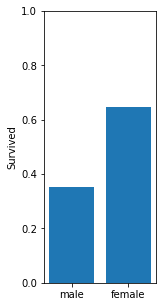

In [37]:
names = ['male', 'female']
counts = data.Sex.value_counts(['male','female'])
plt.figure(figsize=(2, 5))
plt.ylabel('Survived')
plt.ylim([0, 1])
plt.bar(names, [(data.Sex.value_counts().iloc[1])/data.Sex.size,(data.Sex.value_counts().iloc[0])/data.Sex.size])

<class 'list'>


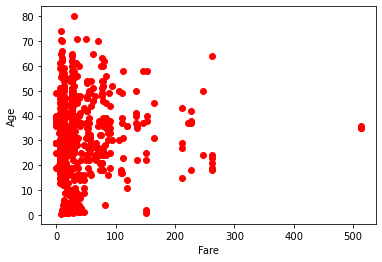

In [38]:
Fare = list(data.Fare.array)
Age = list(data.Age.array)
plt.xlabel('Fare')
plt.ylabel('Age')
print(type(Age))
plt.plot(Fare, Age, 'ro')

In [ ]:
Parch = list(data.Parch.array)
Quantity=[0 for i in range(7)]
#print(Parch)
#print(Quanitity)
for i in np.unique(Parch):
    Quantity[i]=np.sum(Parch==i)
Parch=np.unique(Parch)
plt.xlabel('Parch')
plt.ylabel('Quantity')
plt.bar(Parch, Quantity)

In [ ]:
SibSp = list(data.SibSp.array)
Quantity=[0 for i in range(7)]
for j,i in enumerate(np.unique(SibSp)):
    Quantity[j]=np.sum(SibSp==i)
SibSp=np.unique(SibSp)
print(Quantity)
print(SibSp)
plt.xlabel('SibSp')
plt.ylabel('Quantity')
plt.bar(SibSp, Quantity)

## Split dataset

In [13]:
train_labels=data['Survived']
train_data=data.drop(columns='Survived')
data = shuffle(data)
val_n=int(0.75*len(data))
train_data, val_data = np.split(data,[val_n])
train_labels=train_data['Survived']
val_labels=val_data['Survived']
train_data=train_data.drop(columns=['Survived'])
val_data=val_data.drop(columns=['Survived'])
print(len(train_data))

668


In [51]:
train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,3,1,22.0,1,0,7.2500,0,3,12
1,2,1,0,38.0,1,0,71.2833,0,2,13
2,3,3,0,26.0,0,0,7.9250,0,3,9
3,4,1,0,35.0,1,0,53.1000,0,3,13
4,5,3,1,35.0,0,0,8.0500,0,3,12


In [56]:
val_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
84,85,2,0,17.0,0,0,10.5000,0,3,9
869,870,3,1,4.0,1,1,11.1333,0,3,8
94,95,3,1,59.0,0,0,7.2500,0,3,12
829,830,1,0,62.0,0,0,80.0000,0,3,13
780,781,3,0,13.0,0,0,7.2292,0,2,9


## Stratify split

In [34]:
#rand = np.random.RandomState(10)
#shuffle=rand.permutation(len(data))
#train_data, val_data, train_labels, val_labels = train_test_split(data.drop(columns='Survived'), data['Survived'],test_size=0.2, random_state=1, stratify=data['Survived'])
#print(len(train_data))

712


# Random Forest

In [ ]:
params = {'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 600}
model = RandomForestClassifier(**params)
print('cv accuracy: ', cross_val_score(model, train_data, train_labels, scoring='f1', cv = 10).mean())
model.fit(train_data, train_labels)
predictions_RF = model.predict(test_data)
print('accuracy: ', f1_score(model.predict(val_data), val_labels))

#### Grid Search(RF)

In [13]:
params = {'bootstrap': [True, False],
 'max_depth': [10,  30,  50,  70,  90,  None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [400, 600, 800]}#, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
GSmodel=RandomForestClassifier()
GridS = GridSearchCV(GSmodel,params, cv=3,verbose=2,n_jobs=-1, scoring ='f1')
GridS.fit(train_data, train_labels)
print('accuracy: ', accuracy_score(GridS.predict(val_data), val_labels))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.5s


In [ ]:
GridS.best_params_

#### Search with mlflow

In [ ]:
params = {'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1200
}
mlflow.set_experiment('RF')
with mlflow.start_run():
    model=RandomForestClassifier(**params)
    model.fit(train_data, train_labels)
    accuracy = cross_val_score(model, train_data, train_labels, scoring='f1', cv = 10)
    mlflow.log_param('params', params)
    mlflow.log_metric('f1', accuracy.mean())
    print(accuracy.mean())


#### accuracy on val_data

In [ ]:
params ={'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 500}
model=RandomForestClassifier(**params)
model.fit(train_data, train_labels)
print('accuracy', accuracy_score(model.predict(val_data),val_labels))
print(model.predict(val_data))

# XGB

In [48]:
params = {'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 0.5,
 'n_estimators': 50,
 'reg_lambda': 0.1,
 'subsample': 0.8}
model = XGBClassifier(**params)
print('cv accuracy: ', cross_val_score(model, train_data, train_labels, scoring='accuracy', cv = 10).mean())
model.fit(train_data, train_labels)
predictions_XGB = model.predict(test_data)
print('accuracy: ', accuracy_score(model.predict(val_data), val_labels))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Grid search(XGB)

In [27]:
params = {
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    "max_depth": [2,4,6,10],
    "learning_rate": [0.05,0.1, 0.2, 0.3,0.4],
    "colsample_bytree":[1, .8, .5],
    "subsample": [0.8],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [50]

}
#params = {
#        'min_child_weight': np.linspace(1,10,10),
#        'subsample': np.linspace(0.5,1,6),
#        'colsample_bytree': np.linspace(0.5,1,6),
#        'max_depth': np.linspace(3,10,7).astype('int32'),
#        }

In [29]:
GSmodel=XGBClassifier()
GridS = GridSearchCV(GSmodel,params, cv=3,verbose=2,n_jobs=-1)
GridS.fit(train_data, train_labels)
print('accuracy: ', accuracy_score(GridS.predict(val_data), val_labels))

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 2460 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 3920 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 5700 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7808 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 10236 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 12992 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 16068 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 19472 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 23196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 25920 out of 25920 | elapsed:  5.5min finished


[16:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.8565022421524664


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [30]:
GridS.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 1.0,
 'n_estimators': 50,
 'reg_lambda': 1.0,
 'subsample': 0.8}

#### search with mlflow (XGB)

In [62]:
params = {'colsample_bytree': 0.8,
 'max_depth': 5,
 'min_child_weight': 9.0,
 'subsample': 0.9}
mlflow.set_experiment('XGB')
with mlflow.start_run():
    model=XGBClassifier(**params, eval_metric = 'logloss')
    #model.fit(train_data, train_labels, eval_metric = 'logloss')
    accuracy = cross_val_score(model, train_data, train_labels, scoring='accuracy', cv = 10)
    mlflow.log_param('params', params)
    mlflow.log_metric('cv_accuracy', accuracy.mean())
    print('cv_accuracy:', accuracy.mean())
    model=XGBClassifier(**params)
    model.fit(train_data, train_labels,eval_metric = 'logloss')
    print('accuracy on val_data:', accuracy_score(model.predict(val_data),val_labels))
    mlflow.log_metric('accuracy on val_data', accuracy_score(model.predict(val_data),val_labels))


D:\anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


cv_accuracy: 0.8024197195838987
accuracy on val_data: 0.8116591928251121


# Catboost

In [14]:
params ={'depth': 6, 'iterations': 20, 'learning_rate': 0.2}
model = CatBoostClassifier(**params)
print('cv accuracy: ', cross_val_score(model, train_data, train_labels, scoring='accuracy', cv = 10).mean())
model.fit(train_data, train_labels)
predictions_Catboost = model.predict(test_data)
print("Your submission was successfully saved!")
print('accuracy: ', accuracy_score(model.predict(val_data), val_labels))

0:	learn: 0.6230901	total: 49ms	remaining: 930ms
1:	learn: 0.5746200	total: 49.7ms	remaining: 447ms
2:	learn: 0.5417862	total: 50.6ms	remaining: 287ms
3:	learn: 0.5101477	total: 51.5ms	remaining: 206ms
4:	learn: 0.4864816	total: 52ms	remaining: 156ms
5:	learn: 0.4714236	total: 52.5ms	remaining: 123ms
6:	learn: 0.4551976	total: 53.4ms	remaining: 99.2ms
7:	learn: 0.4429314	total: 54.4ms	remaining: 81.6ms
8:	learn: 0.4341318	total: 55.3ms	remaining: 67.6ms
9:	learn: 0.4243069	total: 55.9ms	remaining: 55.9ms
10:	learn: 0.4156667	total: 56.8ms	remaining: 46.5ms
11:	learn: 0.4079869	total: 57.7ms	remaining: 38.4ms
12:	learn: 0.4007068	total: 58.7ms	remaining: 31.6ms
13:	learn: 0.3954690	total: 59.8ms	remaining: 25.6ms
14:	learn: 0.3909998	total: 60.8ms	remaining: 20.3ms
15:	learn: 0.3857292	total: 61.8ms	remaining: 15.4ms
16:	learn: 0.3817460	total: 62.7ms	remaining: 11.1ms
17:	learn: 0.3780509	total: 63.6ms	remaining: 7.06ms
18:	learn: 0.3746218	total: 64.5ms	remaining: 3.39ms
19:	learn: 0.

#### grid search (Catbo0st)

In [64]:
params = {'depth': [4,5,6,7,8,9,10],
                  'learning_rate' : [0.05,0.1,0.2,0.25],
                  'iterations'    : [10,20,30,40,50,60,70,80,90,100]
                 }

In [65]:
GSmodel = CatBoostClassifier(**params)
GridS = GridSearchCV(GSmodel, params, cv=3,verbose=2,n_jobs=-1, scoring = 'f1')
GridS.fit(train_data, train_labels)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 585 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  2.1min finished


0:	learn: 0.6212135	total: 3.18ms	remaining: 60.5ms
1:	learn: 0.5746227	total: 3.95ms	remaining: 35.5ms
2:	learn: 0.5408558	total: 5.32ms	remaining: 30.2ms
3:	learn: 0.5133471	total: 6.1ms	remaining: 24.4ms
4:	learn: 0.4935230	total: 7.13ms	remaining: 21.4ms
5:	learn: 0.4755153	total: 8.06ms	remaining: 18.8ms
6:	learn: 0.4607774	total: 9.23ms	remaining: 17.1ms
7:	learn: 0.4500185	total: 10.2ms	remaining: 15.3ms
8:	learn: 0.4418811	total: 11.1ms	remaining: 13.6ms
9:	learn: 0.4346304	total: 12ms	remaining: 12ms
10:	learn: 0.4264186	total: 13.2ms	remaining: 10.8ms
11:	learn: 0.4193980	total: 14.8ms	remaining: 9.85ms
12:	learn: 0.4146996	total: 15.8ms	remaining: 8.51ms
13:	learn: 0.4100798	total: 16.9ms	remaining: 7.22ms
14:	learn: 0.4069497	total: 18ms	remaining: 5.99ms
15:	learn: 0.4025933	total: 19.2ms	remaining: 4.79ms
16:	learn: 0.3984398	total: 20.2ms	remaining: 3.56ms
17:	learn: 0.3956717	total: 21.1ms	remaining: 2.35ms
18:	learn: 0.3928224	total: 22.1ms	remaining: 1.16ms
19:	learn:

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000018FC36B7D00>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.05, 0.1, 0.2, 0.25]},
             scoring='f1', verbose=2)

In [67]:
GridS.best_params_

{'depth': 6, 'iterations': 20, 'learning_rate': 0.2}

# LightGBM

In [15]:
params = {'max_depth': 3, 'min_data_in_leaf': 100, 'num_leaves': 3}
model = LGBMClassifier(**params)
print('cv accuracy: ', cross_val_score(model, train_data, train_labels, scoring='f1', cv = 10).mean())
model.fit(train_data, train_labels)
predictions_LGBM = model.predict(test_data)
print('accuracy: ', f1_score(model.predict(val_data), val_labels))


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGB

In [41]:
print('accuracy: ', recall_score(model.predict(val_data), val_labels))

accuracy:  0.6764705882352942


#### grid search (LGBM)

In [69]:
params = {
    'num_leaves': [1, 3, 7, 20, 31, 40, 60, 80, 127, 170, 210],
    'max_depth': [1, 3, 5, 7, 9, 15, 20, 25, 40],
    'min_data_in_leaf': [100, 300, 400, 700, 1000, 1300, 1500],
    }

In [70]:
GSmodel = LGBMClassifier()
GridS = GridSearchCV(GSmodel, params, cv=3,verbose=2,n_jobs=-1, scoring = 'f1')
GridS.fit(train_data, train_labels)

Fitting 3 folds for each of 693 candidates, totalling 2079 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1832 tasks      | elapsed:    9.5s


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


[Parallel(n_jobs=-1)]: Done 2079 out of 2079 | elapsed:   10.8s finished


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 15, 20, 25, 40],
                         'min_data_in_leaf': [100, 300, 400, 700, 1000, 1300,
                                              1500],
                         'num_leaves': [1, 3, 7, 20, 31, 40, 60, 80, 127, 170,
                                        210]},
             scoring='f1', verbose=2)

In [71]:
GridS.best_params_

{'max_depth': 3, 'min_data_in_leaf': 100, 'num_leaves': 3}

#### search with mlflow (LGBM)

In [75]:
params = {'max_depth': 7, 'min_data_in_leaf': 70, 'num_leaves': 75}
mlflow.set_experiment('LGBM')
with mlflow.start_run():
    model=LGBMClassifier(**params)
    #model.fit(train_data, train_labels, eval_metric = 'logloss')
    accuracy = cross_val_score(model, train_data, train_labels, scoring='accuracy', cv = 10)
    mlflow.log_param('params', params)
    mlflow.log_metric('cv_accuracy', accuracy.mean())
    print('cv_accuracy:', accuracy.mean())
    model=LGBMClassifier(**params)
    model.fit(train_data, train_labels)
    print('accuracy on val_data:', accuracy_score(model.predict(val_data),val_labels))
    mlflow.log_metric('accuracy on val_data', accuracy_score(model.predict(val_data),val_labels))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min

# SVM

In [16]:
params = {'C': 5, 'coef0': 0.001, 'degree': 3, 'gamma': 0.0006, 'kernel': 'rbf'}
model = SVC(**params)
clf = make_pipeline(StandardScaler(), model)
print('cv accuracy: ', cross_val_score(clf, train_data, train_labels, scoring='accuracy', cv = 10).mean())
clf.fit(train_data, train_labels)
predictions_SVM = clf.predict(test_data)
print('accuracy: ', accuracy_score(clf.predict(val_data), val_labels))

cv accuracy:  0.7903211216644052
accuracy:  0.7802690582959642


#### gridsearch (SVM)

In [74]:
params = {
    'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
    'C' : np.arange(0.1,1,0.4),
    'degree': np.arange(3,10,3),
    'coef0': np.arange(0.001,5,2),
    'gamma': ('auto', 'scale')
}

In [ ]:
GSmodel=SVC()
GridS = GridSearchCV(GSmodel,params, cv=5,verbose=3, n_jobs=-1,scoring='f1')
GridS.fit(train_data, train_labels)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
GridS.best_parameters

#### search with mlflow (SVM)

In [33]:
params ={'C': 1, 'coef0': 0.001, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
mlflow.set_experiment('LGBM')
with mlflow.start_run():
    model=SVC(**params)
    #model.fit(train_data, train_labels, eval_metric = 'logloss')
    clf = make_pipeline(StandardScaler(), model)
    accuracy = cross_val_score(clf, train_data, train_labels, scoring='accuracy', cv = 10)
    mlflow.log_param('params', params)
    mlflow.log_metric('cv_accuracy', accuracy.mean())
    print('cv_accuracy:', accuracy.mean())
    model=SVC(**params)
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(train_data, train_labels)
    print('accuracy on val_data:', accuracy_score(clf.predict(val_data),val_labels))
    mlflow.log_metric('accuracy on val_data', accuracy_score(clf.predict(val_data),val_labels))

cv_accuracy: 0.822003618272275
accuracy on val_data: 0.8385650224215246


# Logistic Regression

In [16]:
params={'C': 1.0, 'penalty': 'l2'}
model = LogisticRegression(**params)
print('cv accuracy: ', cross_val_score(model, train_data, train_labels, scoring='accuracy', cv = 10).mean())
model.fit(train_data, train_labels)
predictions_LogisticRegression = model.predict(test_data)
print("Your submission was successfully saved!")
print('accuracy: ', f1_score(model.predict(val_data), val_labels))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

cv accuracy:  0.7829036635006785
Your submission was successfully saved!
accuracy:  0.7375


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

#### gridsearch(Logistic Regression)

In [16]:
params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [17]:
GSmodel=LogisticRegression()
GridS = GridSearchCV(GSmodel,params, cv=5,verbose=3, n_jobs=-1,scoring='f1')
GridS.fit(train_data, train_labels)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    8.0s finished
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=3)

In [18]:
GridS.best_params_

{'C': 1.0, 'penalty': 'l2'}

# kNN

In [18]:
params={'n_neighbors': 13}
model = KNeighborsClassifier(**params)
clf = make_pipeline(StandardScaler(), model)
print('cv accuracy: ', cross_val_score(clf, train_data, train_labels, scoring='f1', cv = 10).mean())
clf.fit(train_data, train_labels)

predictions_kNN = clf.predict(test_data)
print("Your submission was successfully saved!")
print('f1: ', accuracy_score(clf.predict(val_data), val_labels))

cv accuracy:  0.750777560512573
Your submission was successfully saved!
f1:  0.8071748878923767


#### gridsearch (kNN)

In [129]:
#print(np.linspace(1,32,32))
params = {'n_neighbors': list(np.linspace(1,32,32).astype('int32'))}


In [133]:
GSmodel=KNeighborsClassifier()
GridS = GridSearchCV(GSmodel,params, cv=5,verbose=3, n_jobs=-1)
GridS.fit(train_data, train_labels)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

In [134]:
GridS.best_params_

{'n_neighbors': 26}

# Final predictions

In [20]:
prediction = [0 for i in range(len(test_data))]
print(len(prediction))
for i in range(len(test_data)):
    sum_predictions=predictions_XGB[i]+predictions_LogisticRegression[i]+predictions_Catboost[i]+predictions_LGBM[i]
    if sum_predictions>2:
        prediction[i]=1
    else:
        prediction[i]=0

print(prediction)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

418
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

# Shap (XGB)

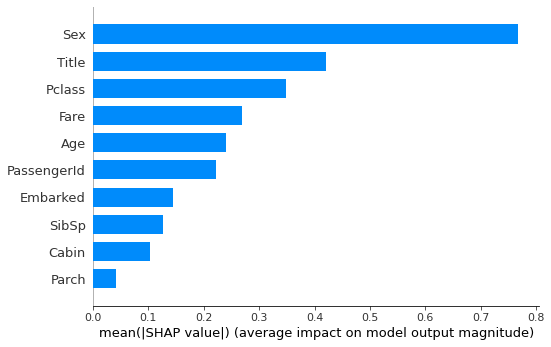

In [14]:
main_explainer = shap.TreeExplainer(model)
shap_values = shap.TreeExplainer(model).shap_values(test_data)
shap.summary_plot(shap_values, test_data, plot_type="bar")

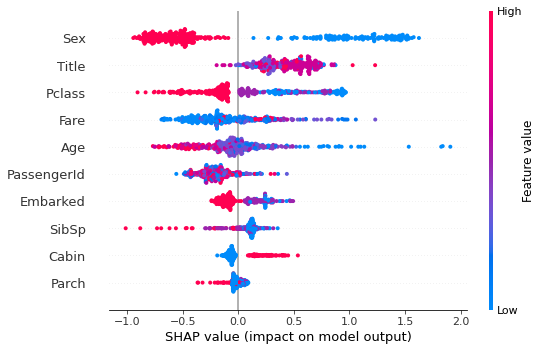

In [15]:
f = plt.figure()
shap.summary_plot(shap_values, test_data)


Sex: Женщины спасались намного чаще мужчин, что интуитивно понятно

Pclass и Fare: Помимо комфорта люди оплачивали и безопасность, поэтому чем выше класс и цена билетов, тем выше шанс выжить

Title: Хорошая фича  

PassengerId: как видно из графика PassengerId не имеет никакой закономерности, но сильно(больше чем Age) влияет на предсказания
модели. Возможно эту фичу стоит вовсе убрать.

Age: Пожилые люди скорее всего умирали, маленькие дети выживали. Люди >35 оплачивали более дорогие билеты, но визуально видно,
что только молодые люди имеют положительное влияние на модель, это странно

SibSp: много братьев - плохо, 1-2 - хорошо, отсутствие - нормально

Embarked: Модель посчитала, что порт 3 несчастливый

Parch: Слишком много детей - плохо. 1-2 давали шанс выжить

Cabin: В тренировочном датасете у тех, у кого было заполнено поле Cabin был больше процент выживания, возможно это как-то связано

In [16]:
shap.initjs()
shap.force_plot(main_explainer.expected_value, shap_values[1,:], test_data.iloc[1,:])

Этот график объясняет почему для конкретного человека модель выбрала тот или другой результат.
Красными подсвечены фичи которые "оттягивают" предсказание модели в сторону 1(жизнь), синими в сторону 0(смерть) 

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


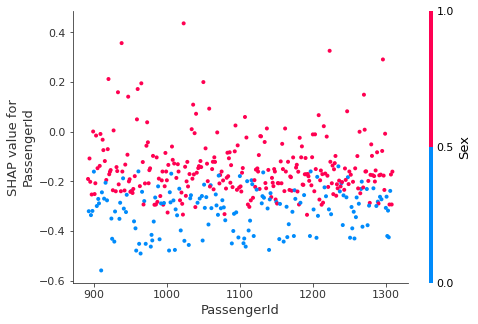

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


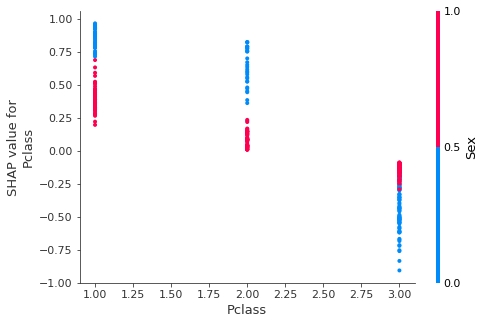

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


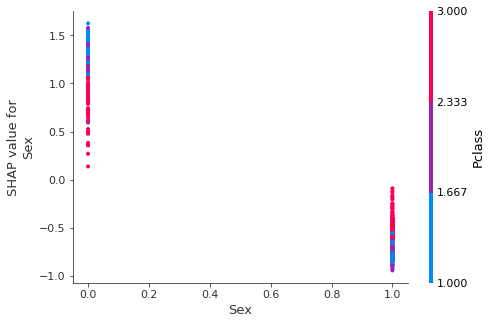

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


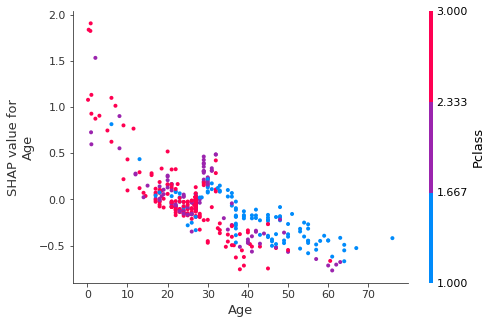

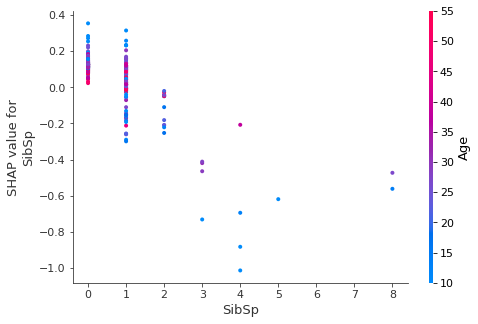

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


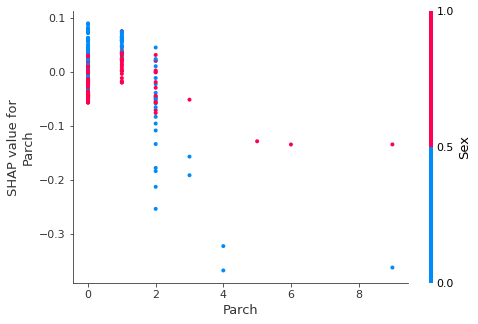

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


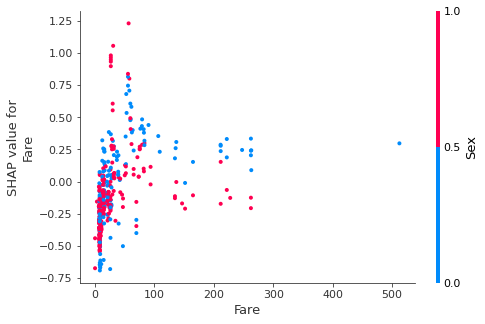

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


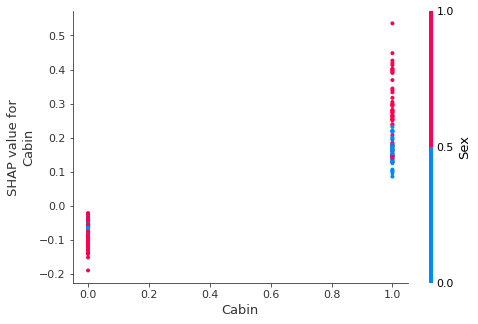

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


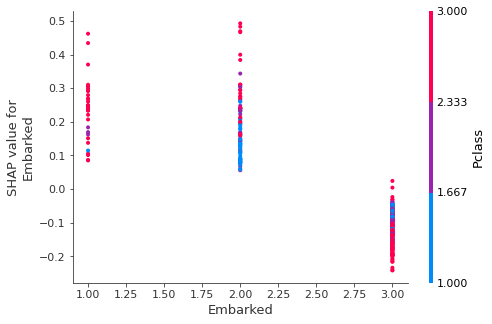

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


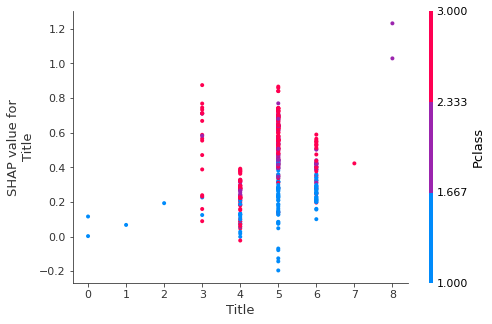

In [17]:
for feature in test_data.columns:
    shap.dependence_plot(feature, shap_values, test_data)

Эти графики показывают силу влияния определенной переменной на предсказания + для каждой точки графика по цвету можно определить значение другой фичи, выбранной самой функцией

# Feature importance (XGB)

In [49]:
importance = model.feature_importances_.squeeze()
columns = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Title']

<BarContainer object of 10 artists>

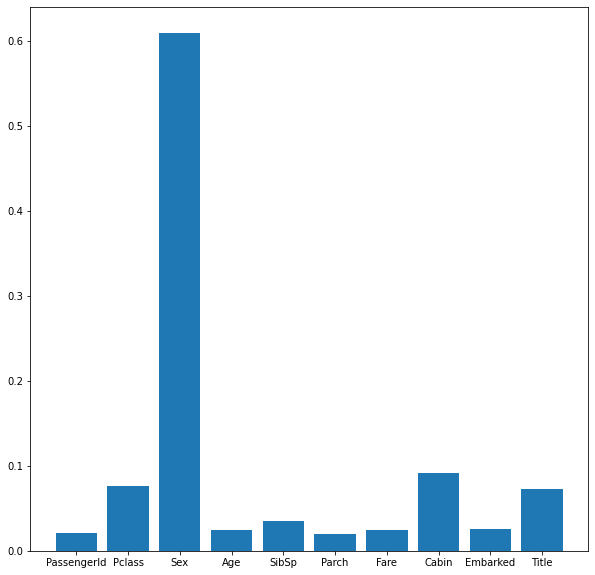

In [50]:
plt.figure(figsize=(10, 10))
plt.bar(columns, importance)


In [51]:
importance

array([0.02074104, 0.0764396 , 0.60918134, 0.02406132, 0.03469072,
       0.01985938, 0.02421823, 0.09186956, 0.02609588, 0.07284295],
      dtype=float32)